<a href="https://colab.research.google.com/github/geojaimo/relevel/blob/main/olympics_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
olympics=pd.read_csv('/content/drive/MyDrive/athlete_events.csv')
olympics.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
olympics.shape

(271116, 15)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


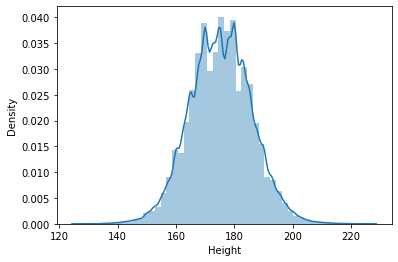

In [5]:
sns.distplot(olympics['Height'].dropna())

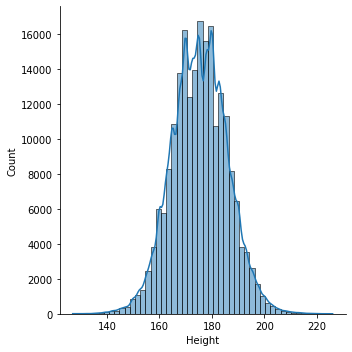

In [6]:
sns.displot(olympics['Height'].dropna(),kde=True,bins=50)

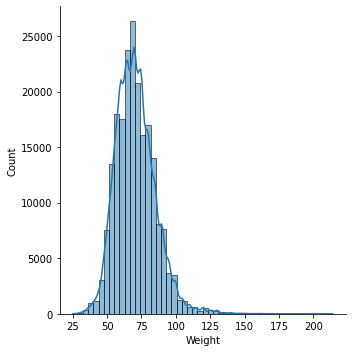

In [7]:
sns.displot(olympics['Weight'].dropna(),kde=True,bins=50)

<Figure size 720x360 with 0 Axes>

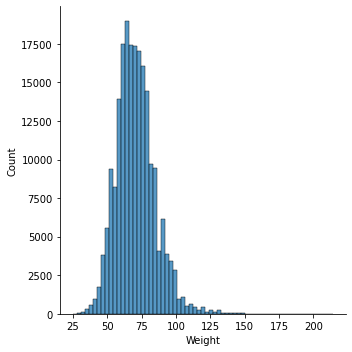

In [8]:
plt.figure(figsize=(10,5))
sns.displot(olympics['Weight'].dropna(),kde=False,bins=65)

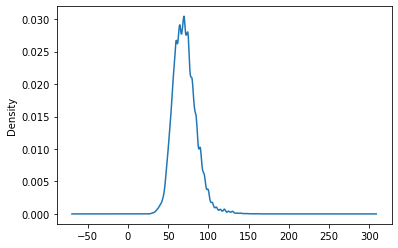

In [9]:
olympics['Weight'].plot.kde()

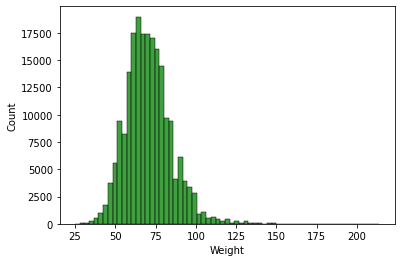

In [10]:
sns.histplot(olympics['Weight'],color='green',bins=65)

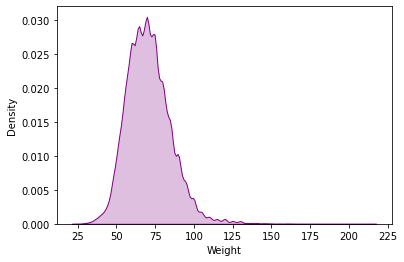

In [11]:
sns.kdeplot(olympics['Weight'].dropna(),shade=True,color='purple')

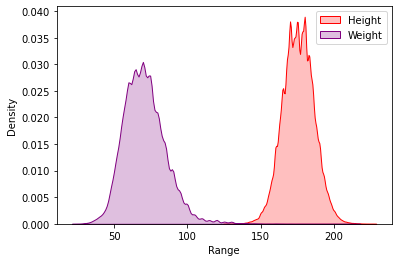

In [12]:
sns.kdeplot(olympics['Height'].dropna(),shade=True,label='Height',color='r')
sns.kdeplot(olympics['Weight'].dropna(),shade=True,label='Weight',color='purple')
plt.legend()
plt.xlabel('Range')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


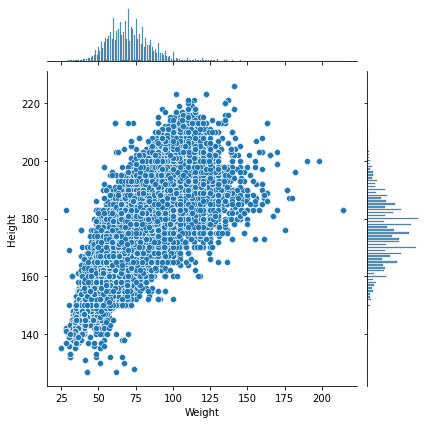

In [13]:
sns.jointplot(olympics['Weight'],olympics['Height'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


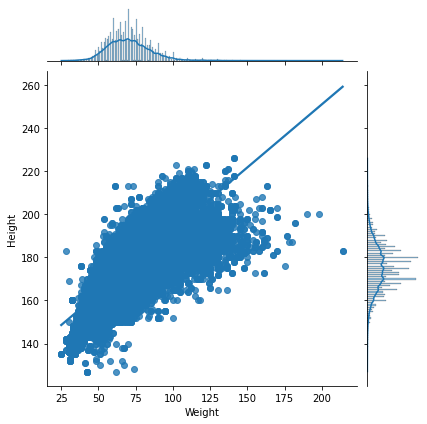

In [14]:
sns.jointplot(olympics['Weight'],olympics['Height'],kind='reg')

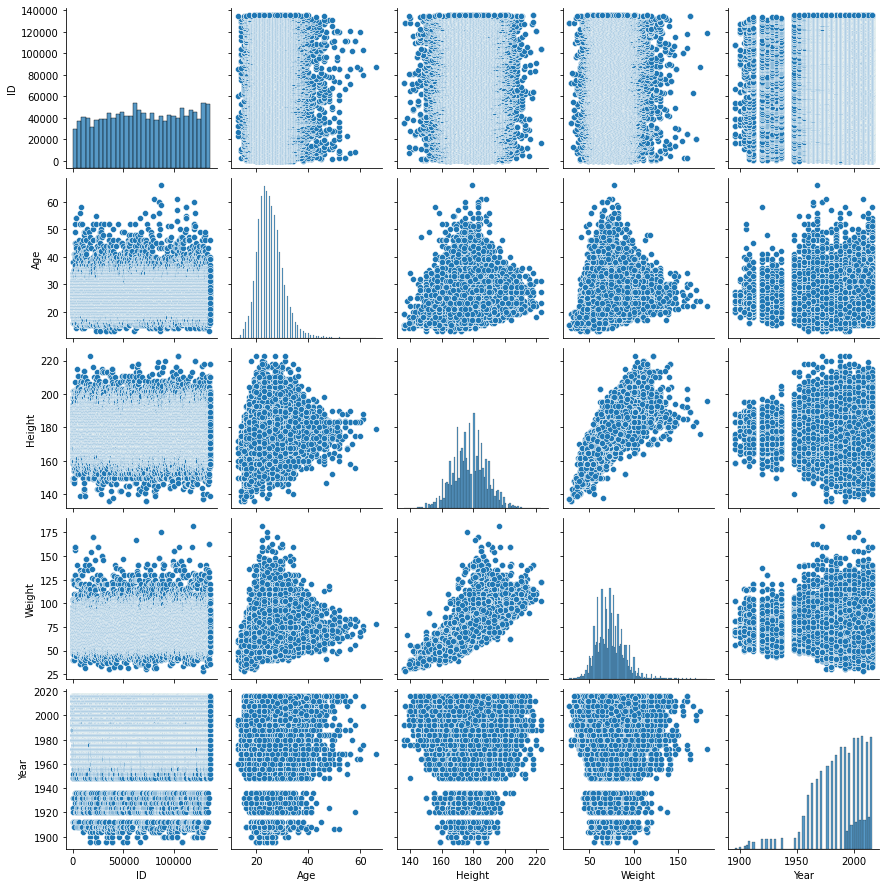

In [15]:
sns.pairplot(olympics.dropna())

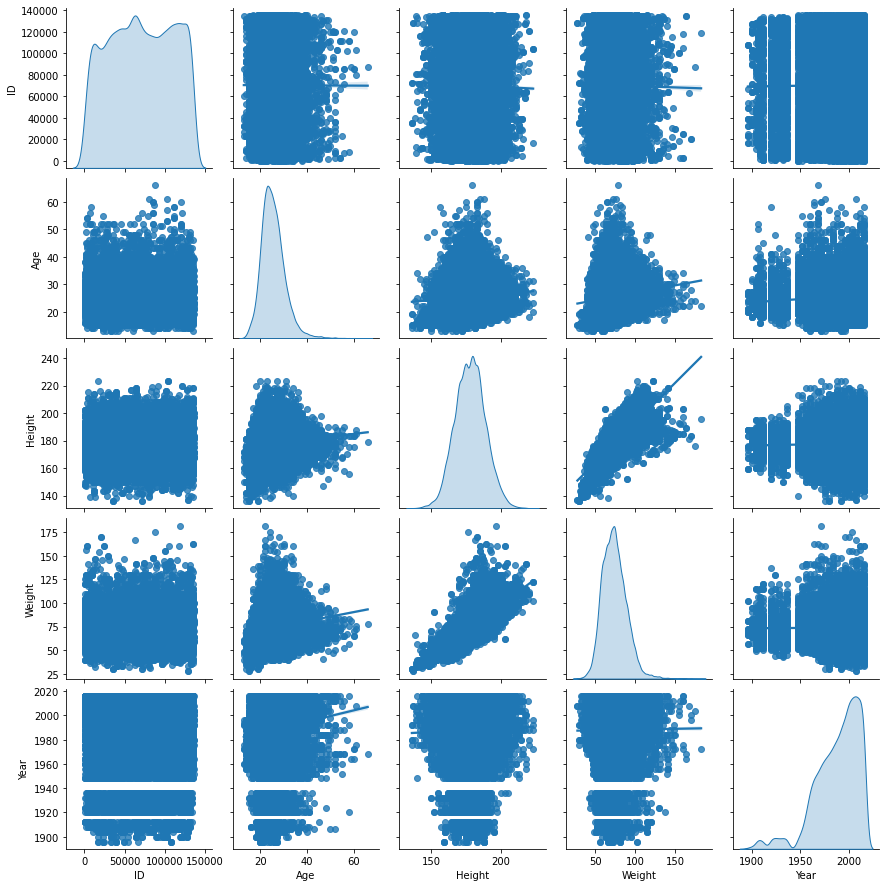

In [16]:
sns.pairplot(olympics.dropna(),kind='reg',diag_kind= 'kde')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


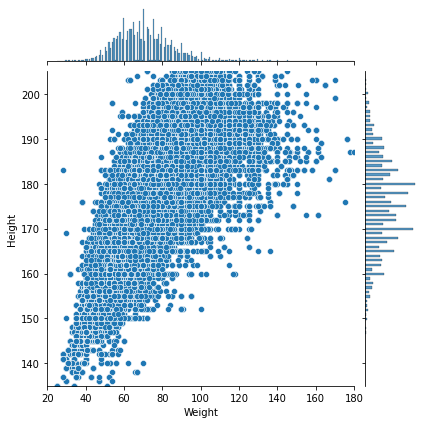

In [17]:
sns.jointplot(olympics['Weight'],olympics['Height'],xlim=(20,180),ylim=(135,205))



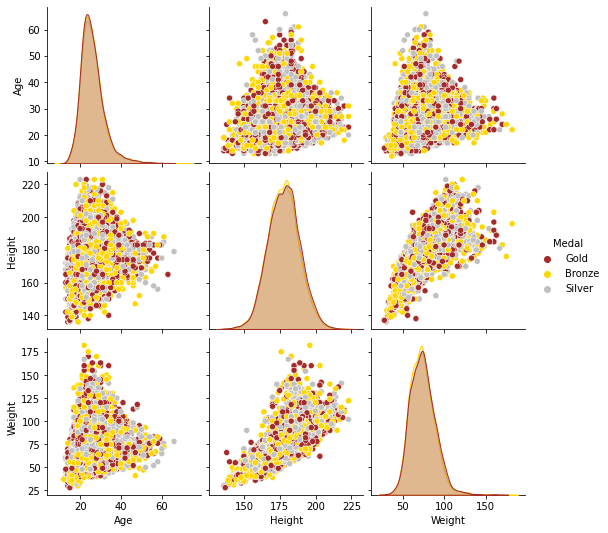

In [18]:
sns.pairplot(olympics,hue='Medal',palette=['brown','gold','silver'],x_vars=['Age','Height','Weight'],y_vars=['Age','Height','Weight'])

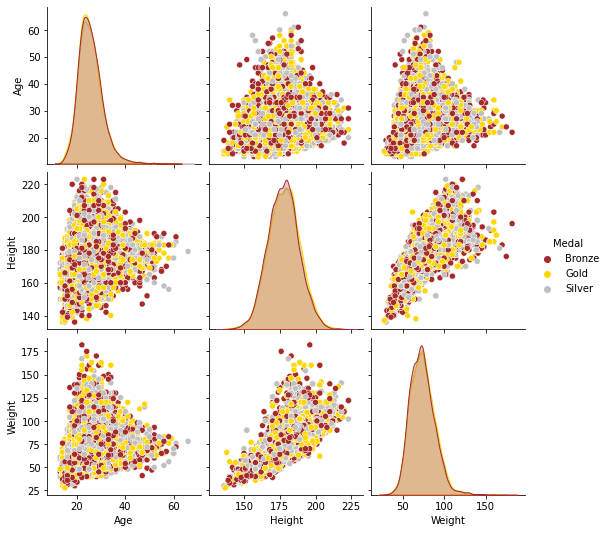

In [19]:
sns.pairplot(olympics[['Age','Height','Weight','Medal']].dropna(),hue='Medal',palette=['brown','gold','silver'])

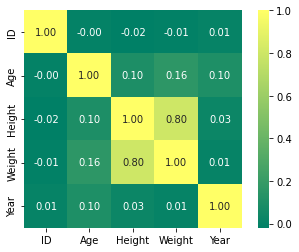

In [20]:
sns.heatmap(olympics.dropna().corr(),square=True,annot=True,fmt='.2f',cmap='summer')

In [21]:
olympics.dropna().corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.001380,-0.019573,-0.010293,0.007477
Age,-0.001380,1.000000,0.095942,0.161750,0.103740
Height,-0.019573,0.095942,1.000000,0.801831,0.029073
Weight,-0.010293,0.161750,0.801831,1.000000,0.008149
Year,0.007477,0.103740,0.029073,0.008149,1.000000


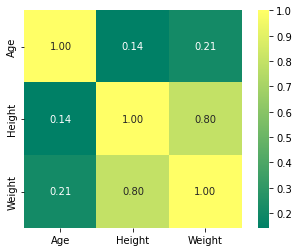

In [22]:
sns.heatmap(olympics[['Age','Height','Weight']].dropna().corr(),square=True,annot=True,fmt='.2f',cmap='summer')

In [23]:
olympics_gold=olympics[olympics.Medal=='Gold']
olympics_gold.reset_index()

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
2,44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
3,48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
4,60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13367,270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
13368,271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
13369,271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
13370,271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [24]:
olympics_gold_plot=olympics_gold[['Team','Medal']].groupby('Team',as_index=False).agg({'Medal':'count'}).sort_values('Medal',ascending=False)
olympics_gold_plot.head(10)

,Team,Medal
224,United States,2474
200,Soviet Union,1058
87,Germany,679
112,Italy,535
90,Great Britain,519
80,France,455
205,Sweden,451
102,Hungary,432
35,Canada,422
62,East Germany,369


Text(0.5, 1.0, 'Top 20 Countries by Medals')

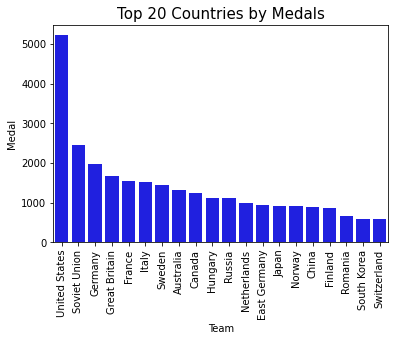

In [36]:
olympics_medals= olympics[['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)

olympics_medals_bar = olympics_medals[0:20]

sns.barplot(x="Team",y="Medal",data=olympics_medals_bar, color= 'blue')
plt.xticks(rotation = 90 )
plt.title('Top 20 Countries by Medals', size = 15)

Text(0.5, 1.0, 'Top 20 Countries by gold_medals')

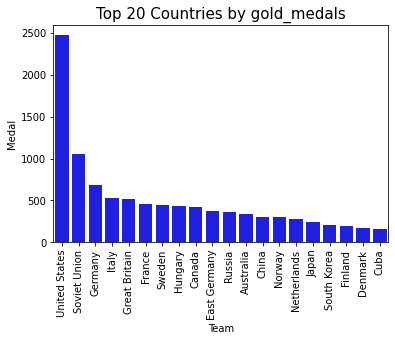

In [49]:
# olympics_gold = olympics[(olympics['Medal']=='Gold') ] 
olympics_medals_gold= olympics[(olympics['Medal']=='Gold') ] [['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)[0:20]
sns.barplot(x="Team",y="Medal",data=olympics_medals_gold, color= 'blue')
plt.xticks(rotation = 90 )
plt.title('Top 20 Countries by gold_medals', size = 15)

Text(0.5, 1.0, 'Top 20 Countries by silver_medals')

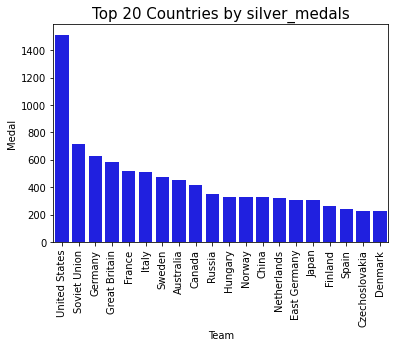

In [50]:
olympics_medals_silver= olympics[(olympics['Medal']=='Silver') ] [['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)[0:20]
sns.barplot(x="Team",y="Medal",data=olympics_medals_silver, color= 'blue')
plt.xticks(rotation = 90 )
plt.title('Top 20 Countries by silver_medals', size = 15)

Text(0.5, 1.0, 'Top 20 Countries by bronze_medals')

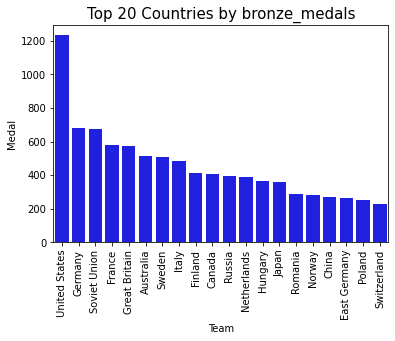

In [51]:
olympics_medals_bronze= olympics[(olympics['Medal']=='Bronze') ] [['Team','Medal']].groupby('Team', as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)[0:20]
sns.barplot(x="Team",y="Medal",data=olympics_medals_bronze, color= 'blue')
plt.xticks(rotation = 90 )
plt.title('Top 20 Countries by bronze_medals', size = 15)

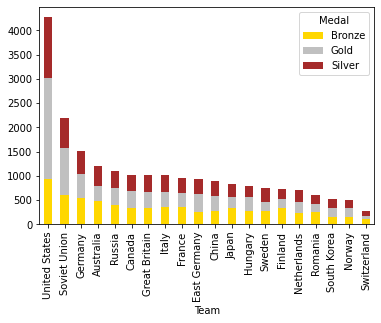

In [82]:
btop20 = olympics_medals_bar['Team']
olympics20 = olympics[olympics.Team.isin(top20)].dropna()
df1 = pd.pivot_table(data = olympics20, index = 'Team', columns = 'Medal', aggfunc = 'count')['ID']
df1 = df1.reset_index()
df1['Total'] = df1.Gold + df1.Silver + df1.Bronze
df1 = df1.sort_values('Total', ascending = False)
df1 = df1.drop('Total', axis = 1)
df1

df1.set_index('Team').plot(kind='bar', stacked=True, color=['Gold', 'Silver','brown'])

plt.title('Top 20 Countries by Medals ( Stacked )', size = 15)

plt.xticks(rotation = 90 )

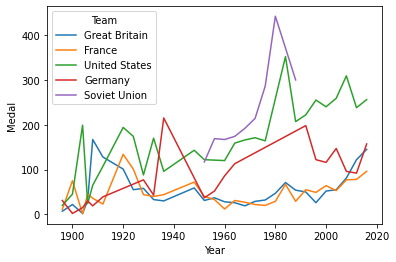

In [83]:
top5 =olympics_medals_bar[0:5]['Team']
year_medals = olympics[olympics['Season']=='Summer']
year_medals_summer = year_medals[['Team','Year','Medal']].groupby(['Team','Year'], as_index=False).agg({"Medal": "count"}).sort_values("Medal",ascending=False)

year_medals_line = year_medals_summer[year_medals_summer['Team'].isin(top5)].sort_values(['Year'],ascending=False)

sns.lineplot(x='Year',y='Medal',hue='Team',data=year_medals_line)

Text(0.5, 1.0, "India's Medalists over years")

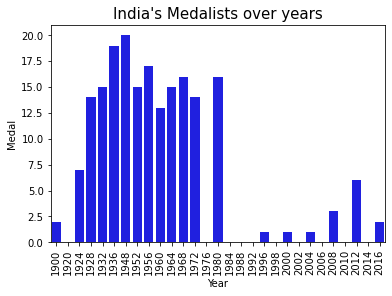

In [84]:
olympics_india = olympics[olympics['Team']=="India"]
olympics_medals_india= olympics_india[['Team','Year','Medal']].groupby(['Team','Year'], as_index=False).agg({"Medal": "count"})

sns.barplot(x="Year",y="Medal",data=olympics_medals_india, color= 'blue')
plt.xticks(rotation = 90 )
plt.title("India's Medalists over years", size = 15)